In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\KIIT\\Desktop\\Quantium\\Task1\\Datamerged_data_task1.csv')

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,201810
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,201905
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,201905
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,201808
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium,201903
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium,201808
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium,201811
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium,201812


In [4]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
YEARMONTH           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
 12  YEARMONTH         246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memor

In [6]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [7]:
measure_over_time = df.groupby(['YEARMONTH', 'STORE_NBR']).agg(
    totSales=('TOT_SALES', 'sum'),                                # Total sales
    nCustomers=('LYLTY_CARD_NBR', pd.Series.nunique),             # Number of unique customers
    nTxnPerCust=('TXN_ID', 'count'),                              # Number of transactions per store/month
    nChipsPerTxn=('PROD_QTY', 'mean'),                            # Average quantity of chips per transaction
    total_units_sold=('PROD_QTY', 'sum')                          # Total number of units sold
).reset_index()

# Calculate transactions per customer
measure_over_time['nTxnPerCust'] = measure_over_time['nTxnPerCust'] / measure_over_time['nCustomers']

# Calculate average price per unit (total sales / total units sold)
measure_over_time['avgPricePerUnit'] = measure_over_time['totSales'] / measure_over_time['total_units_sold']

# Drop the 'total_units_sold' column as it's no longer needed
measure_over_time.drop(columns=['total_units_sold'], inplace=True)

# Sort by the columns of interest (e.g., YEARMONTH)
measure_over_time = measure_over_time.sort_values(by=['YEARMONTH', 'STORE_NBR'])

# Display the result
print(measure_over_time)

     YEARMONTH  STORE_NBR  totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
0       201807          1     188.9          47     1.042553      1.183673   
1       201807          2     140.5          36     1.055556      1.131579   
2       201807          3    1164.9         108     1.240741      1.962687   
3       201807          4    1318.3         121     1.256198      1.986842   
4       201807          5     763.8          86     1.290698      2.000000   
...        ...        ...       ...         ...          ...           ...   
3160    201906        268     220.6          36     1.055556      1.447368   
3161    201906        269     770.2          93     1.225806      2.000000   
3162    201906        270     831.2          96     1.187500      2.000000   
3163    201906        271     884.2         106     1.160377      2.000000   
3164    201906        272     301.9          33     1.090909      1.888889   

      avgPricePerUnit  
0            3.256897  
1            3.

In [8]:
# 1: Identify stores with full observation periods (12 months of data)
# Count the number of records per store
store_counts = measure_over_time.groupby('STORE_NBR')['YEARMONTH'].count().reset_index()

# Filter to stores with exactly 12 months of data
stores_with_full_obs = store_counts[store_counts['YEARMONTH'] == 12]['STORE_NBR'].unique()

# 2: Filter to the pre-trial period and the identified stores
pre_trial_measures = measure_over_time[
    (measure_over_time['YEARMONTH'] < '201902') & 
    (measure_over_time['STORE_NBR'].isin(stores_with_full_obs))
]

# Display the filtered data
print(pre_trial_measures)

     YEARMONTH  STORE_NBR  totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
0       201807          1     188.9          47     1.042553      1.183673   
1       201807          2     140.5          36     1.055556      1.131579   
2       201807          3    1164.9         108     1.240741      1.962687   
3       201807          4    1318.3         121     1.256198      1.986842   
4       201807          5     763.8          86     1.290698      2.000000   
...        ...        ...       ...         ...          ...           ...   
1841    201901        268     150.6          35     1.000000      1.228571   
1842    201901        269     912.4         102     1.303922      2.000000   
1843    201901        270    1009.8         110     1.327273      2.000000   
1844    201901        271     768.2          82     1.292683      2.000000   
1845    201901        272     392.4          44     1.068182      1.914894   

      avgPricePerUnit  
0            3.256897  
1            3.

In [9]:
from scipy.stats import pearsonr

In [10]:
def calculate_correlation(input_table, metric_col, trial_store):
    calc_corr_table = []
    store_numbers = input_table['STORE_NBR'].unique()
    trial_store_data = input_table[input_table['STORE_NBR'] == trial_store][metric_col]
    for store in store_numbers:
        if store != trial_store:
            control_store_data = input_table[input_table['STORE_NBR'] == store][metric_col]
            
            if len(trial_store_data) == len(control_store_data):
                corr_measure, _ = pearsonr(trial_store_data, control_store_data)
            else:
                corr_measure = float('nan')
            
            calc_corr_table.append({
                'Store1': trial_store,
                'Store2': store,
                'corr_measure': corr_measure
            })
    
    calc_corr_table_df = pd.DataFrame(calc_corr_table)
    
    return calc_corr_table_df


In [11]:
trial_store_number = 77  # Example trial store
correlation_results = calculate_correlation(pre_trial_measures, 'totSales', trial_store_number)

print(correlation_results)

     Store1  Store2  corr_measure
0        77       1     -0.005382
1        77       2     -0.251183
2        77       3      0.660447
3        77       4     -0.347846
4        77       5     -0.139048
..      ...     ...           ...
253      77     268      0.395460
254      77     269     -0.466370
255      77     270      0.274854
256      77     271      0.195190
257      77     272     -0.179647

[258 rows x 3 columns]


In [12]:
def calculate_magnitude_distance(input_table, metric_col, trial_store):

    calc_dist_table = []
    
    
    store_numbers = input_table['STORE_NBR'].unique()
    

    trial_store_data = input_table[input_table['STORE_NBR'] == trial_store]
    
    
    for store in store_numbers:
        if store != trial_store:
            
            control_store_data = input_table[input_table['STORE_NBR'] == store]
            

            merged_data = pd.merge(trial_store_data[['YEARMONTH', metric_col]], 
                                   control_store_data[['YEARMONTH', metric_col]], 
                                   on='YEARMONTH', 
                                   suffixes=('_trial', '_control'))
            
            
            merged_data['measure'] = abs(merged_data[metric_col + '_trial'] - merged_data[metric_col + '_control'])
            

            for index, row in merged_data.iterrows():
                calc_dist_table.append({
                    'Store1': trial_store,
                    'Store2': store,
                    'YEARMONTH': row['YEARMONTH'],
                    'measure': row['measure']
                })
    
    
    calc_dist_table_df = pd.DataFrame(calc_dist_table)
    
    return calc_dist_table_df


In [13]:
trial_store_number = 77  # Example trial store
magnitude_distance_results = calculate_magnitude_distance(pre_trial_measures, 'totSales', trial_store_number)
print(magnitude_distance_results)

      Store1  Store2 YEARMONTH  measure
0         77       1    201807     79.5
1         77       1    201808     79.1
2         77       1    201809     51.3
3         77       1    201810     18.9
4         77       1    201811     40.1
...      ...     ...       ...      ...
1801      77     272    201809     77.7
1802      77     272    201810    210.8
1803      77     272    201811    130.9
1804      77     272    201812    107.9
1805      77     272    201901    204.0

[1806 rows x 4 columns]


In [14]:
min_max_dist = magnitude_distance_results.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
min_max_dist.columns = ['Store1', 'YEARMONTH', 'minDist', 'maxDist']

dist_table = pd.merge(magnitude_distance_results, min_max_dist, on=['Store1', 'YEARMONTH'])

dist_table['magnitudeMeasure'] = 1 - (dist_table['measure'] - dist_table['minDist']) / (dist_table['maxDist'] - dist_table['minDist'])

final_dist_table = dist_table.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
final_dist_table.columns = ['Store1', 'Store2', 'mag_measure']

print(final_dist_table)

     Store1  Store2  mag_measure
0        77       1     0.953691
1        77       2     0.937207
2        77       3     0.345432
3        77       4     0.181068
4        77       5     0.565130
..      ...     ...          ...
253      77     268     0.963657
254      77     269     0.455216
255      77     270     0.458426
256      77     271     0.572703
257      77     272     0.892823

[258 rows x 3 columns]


In [15]:
# Trial store (e.g., store 77)
trial_store = 77

# Correlation for total sales
corr_nSales = calculate_correlation(pre_trial_measures, 'totSales', trial_store)

# Correlation for number of customers
corr_nCustomers = calculate_correlation(pre_trial_measures, 'nCustomers', trial_store)

# magnitude distance for total sales
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, 'totSales', trial_store)

# magnitude distance for number of customers
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', trial_store)

print("Correlation for Total Sales:")
print(corr_nSales)

print("\nCorrelation for Number of Customers:")
print(corr_nCustomers)

print("\nMagnitude Distance for Total Sales:")
print(magnitude_nSales)

print("\nMagnitude Distance for Number of Customers:")
print(magnitude_nCustomers)

Correlation for Total Sales:
     Store1  Store2  corr_measure
0        77       1     -0.005382
1        77       2     -0.251183
2        77       3      0.660447
3        77       4     -0.347846
4        77       5     -0.139048
..      ...     ...           ...
253      77     268      0.395460
254      77     269     -0.466370
255      77     270      0.274854
256      77     271      0.195190
257      77     272     -0.179647

[258 rows x 3 columns]

Correlation for Number of Customers:
     Store1  Store2  corr_measure
0        77       1      0.337866
1        77       2     -0.596492
2        77       3      0.755249
3        77       4     -0.305412
4        77       5      0.224768
..      ...     ...           ...
253      77     268      0.369736
254      77     269     -0.247581
255      77     270     -0.009182
256      77     271      0.023635
257      77     272      0.068677

[258 rows x 3 columns]

Magnitude Distance for Total Sales:
      Store1  Store2 YEARMONTH  

In [16]:
# Define the weight for the correlation score
corr_weight = 0.5

# Merge the correlation and magnitude distance tables for total sales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['ScoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['measure']

# Merge the correlation and magnitude distance tables for number of customers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['ScoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['measure']

print("Combined Score for Total Sales:")
print(score_nSales[['Store1', 'Store2', 'ScoreNSales']])

print("\nCombined Score for Number of Customers:")
print(score_nCustomers[['Store1', 'Store2', 'ScoreNCust']])


Combined Score for Total Sales:
      Store1  Store2  ScoreNSales
0         77       1    39.747309
1         77       1    39.547309
2         77       1    25.647309
3         77       1     9.447309
4         77       1    20.047309
...      ...     ...          ...
1801      77     272    38.760177
1802      77     272   105.310177
1803      77     272    65.360177
1804      77     272    53.860177
1805      77     272   101.910177

[1806 rows x 3 columns]

Combined Score for Number of Customers:
      Store1  Store2  ScoreNCust
0         77       1    0.168933
1         77       1    2.668933
2         77       1    8.668933
3         77       1    1.668933
4         77       1    2.668933
...      ...     ...         ...
1801      77     272    4.534339
1802      77     272    2.534339
1803      77     272    0.034339
1804      77     272    0.034339
1805      77     272    6.534339

[1806 rows x 3 columns]


In [17]:
score_Control = pd.merge(score_nSales[['Store1', 'Store2', 'ScoreNSales']],
                         score_nCustomers[['Store1', 'Store2', 'ScoreNCust']],
                         on=['Store1', 'Store2'])

score_Control['finalControlScore'] = 0.5 * score_Control['ScoreNSales'] + 0.5 * score_Control['ScoreNCust']

print("Final Control Score:")
print(score_Control[['Store1', 'Store2', 'finalControlScore']])

Final Control Score:
       Store1  Store2  finalControlScore
0          77       1          19.958121
1          77       1          21.208121
2          77       1          24.208121
3          77       1          20.708121
4          77       1          21.208121
...       ...     ...                ...
12637      77     272          53.222258
12638      77     272          52.222258
12639      77     272          50.972258
12640      77     272          50.972258
12641      77     272          54.222258

[12642 rows x 3 columns]


In [18]:
trial_store = 77

filtered_scores = score_Control[score_Control['Store2'] != trial_store]

filtered_scores = filtered_scores.sort_values(by='finalControlScore', ascending=False)

control_store = filtered_scores.iloc[0]['Store2']

print(f"The selected control store for trial store {trial_store} is store number {control_store}.")


The selected control store for trial store 77 is store number 226.0.


In [19]:
measure_over_time.info()
"""
measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

pastSales = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['totSales'].mean().reset_index()

pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

pastSales = pastSales[pastSales['YEARMONTH'] < 201903]

plt.figure(figsize=(10, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')

plt.xlabel("Month of Operation")
plt.ylabel("Total Sales")
plt.title("Total Sales by Month")
plt.xticks(rotation=45)
plt.legend(title='Store Type')

plt.show()
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEARMONTH        3165 non-null   object 
 1   STORE_NBR        3165 non-null   int64  
 2   totSales         3165 non-null   float64
 3   nCustomers       3165 non-null   int64  
 4   nTxnPerCust      3165 non-null   float64
 5   nChipsPerTxn     3165 non-null   float64
 6   avgPricePerUnit  3165 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 173.2+ KB


'\nmeasure_over_time[\'Store_type\'] = measure_over_time[\'STORE_NBR\'].apply(\n    lambda x: \'Trial\' if x == trial_store else (\'Control\' if x == control_store else \'Other stores\')\n)\n\npastSales = measure_over_time.groupby([\'YEARMONTH\', \'Store_type\'])[\'totSales\'].mean().reset_index()\n\npastSales[\'TransactionMonth\'] = pd.to_datetime(pastSales[\'YEARMONTH\'].astype(str) + \'01\', format=\'%Y%m%d\')\n\npastSales = pastSales[pastSales[\'YEARMONTH\'] < 201903]\n\nplt.figure(figsize=(10, 6))\nsns.lineplot(data=pastSales, x=\'TransactionMonth\', y=\'totSales\', hue=\'Store_type\')\n\nplt.xlabel("Month of Operation")\nplt.ylabel("Total Sales")\nplt.title("Total Sales by Month")\nplt.xticks(rotation=45)\nplt.legend(title=\'Store Type\')\n\nplt.show()\n'

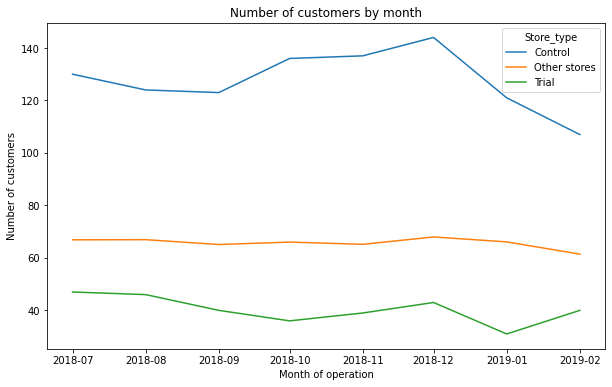

In [20]:
pastCustomers = measure_over_time.copy()
pastCustomers['Store_type'] = pastCustomers['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else 'Other stores'
)

# Step 2: Calculate the average number of customers by month and store type
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].mean().reset_index()

# Step 3: Convert YEARMONTH to a date format for plotting
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str) + '01', format='%Y%m%d')
pastCustomers['YEARMONTH'] = pastCustomers['YEARMONTH'].astype(int)
# Step 4: Filter data to include only the pre-trial period (before March 2019)
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Step 5: Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')
plt.show()

In [21]:
#pre_trial_measures
pre_trial_measures['YEARMONTH'] = pre_trial_measures['YEARMONTH'].astype(int)
pre_trial_trial_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & 
                                         (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

pre_trial_control_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & 
                                           (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

# Calculate the scaling factor
scalingFactorForControlSales = pre_trial_trial_sales / pre_trial_control_sales

In [22]:
measureOverTimeSales = measure_over_time.copy()

# Apply the scaling factor to the control store's sales
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = (
    measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * 
    scalingFactorForControlSales
)

In [23]:
measureOverTimeSales['YEARMONTH'] = measureOverTimeSales['YEARMONTH'].astype(int)

trial_period = (measureOverTimeSales['YEARMONTH'] >= 201902) & (measureOverTimeSales['YEARMONTH'] <= 201904)

trial_sales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == trial_store) & trial_period][['YEARMONTH', 'totSales']]

scaled_control_sales = measureOverTimeSales[(measureOverTimeSales['STORE_NBR'] == control_store) & trial_period][['YEARMONTH', 'totSales']]
scaled_control_sales['scaledSales'] = scaled_control_sales['totSales'] * scalingFactorForControlSales

percentageDiff = trial_sales.merge(scaled_control_sales, on='YEARMONTH', suffixes=('_trial', '_control'))

percentageDiff['percentageDiff'] = ((percentageDiff['totSales_trial'] - percentageDiff['scaledSales']) / percentageDiff['scaledSales']) * 100

print(percentageDiff[['YEARMONTH', 'totSales_trial', 'scaledSales', 'percentageDiff']])

   YEARMONTH  totSales_trial  scaledSales  percentageDiff
0     201902           211.6   196.890259        7.471035
1     201903           255.1   231.021428       10.422657
2     201904           258.1   230.063245       12.186543


In [24]:
pre_trial_percentage_diff = percentageDiff[percentageDiff['YEARMONTH'] < 201902]

std_dev = pre_trial_percentage_diff['percentageDiff'].std()

print(f"Standard Deviation of the percentage difference in the pre-trial period: {std_dev}")


Standard Deviation of the percentage difference in the pre-trial period: nan


In [25]:
import scipy.stats as stats

In [26]:
mu = 0  # Null hypothesis value
degrees_of_freedom = 7

percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - mu) / std_dev

t_critical = stats.t.ppf(0.95, df=degrees_of_freedom)

percentageDiff['TransactionMonth'] = pd.to_datetime(percentageDiff['YEARMONTH'].astype(str), format='%Y%m')

print(percentageDiff[['TransactionMonth', 'percentageDiff', 'tValue']])
print(f"95th percentile of the t-distribution with {degrees_of_freedom} degrees of freedom: {t_critical}")

  TransactionMonth  percentageDiff  tValue
0       2019-02-01        7.471035     NaN
1       2019-03-01       10.422657     NaN
2       2019-04-01       12.186543     NaN
95th percentile of the t-distribution with 7 degrees of freedom: 1.894578605061305


In [27]:
pastSales = measureOverTimeSales.copy()
pastSales['Store_type'] = pastSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
pastSales['totSales'] = pastSales.groupby(['YEARMONTH', 'Store_type'])['totSales'].transform('mean')
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m')

pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + std_dev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - std_dev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])


In [28]:
# Check the length of columns
print("Length of 'TransactionMonth':", len(trialAssessment['TransactionMonth']))
print("Length of 'totSales':", len(trialAssessment['totSales']))
print("Length of 'Store_type':", len(trialAssessment['Store_type']))
print(trialAssessment.head())


Length of 'TransactionMonth': 48
Length of 'totSales': 48
Length of 'Store_type': 48
     YEARMONTH  STORE_NBR  totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
73      201807         77    268.40          47     1.085106      1.509804   
218     201807        226   1398.60         130     1.230769      2.000000   
336     201808         77    247.50          46     1.000000      1.543478   
480     201808        226   1169.25         124     1.177419      1.890411   
601     201809         77    216.80          40     1.050000      1.571429   

     avgPricePerUnit  controlSales Store_type TransactionMonth  
73          3.485714           NaN      Trial       2018-07-01  
218         4.370625    231.054469    Control       2018-07-01  
336         3.485915           NaN      Trial       2018-08-01  
480         4.236413    193.164906    Control       2018-08-01  
601         3.284848           NaN      Trial       2018-09-01  


In [29]:
print(trialAssessment.isna().sum())  # Check for NaN values and column types

YEARMONTH            0
STORE_NBR            0
totSales            24
nCustomers           0
nTxnPerCust          0
nChipsPerTxn         0
avgPricePerUnit      0
controlSales        12
Store_type           0
TransactionMonth     0
dtype: int64


In [30]:
trialAssessment.dropna(subset=['totSales', 'controlSales'], inplace=True)

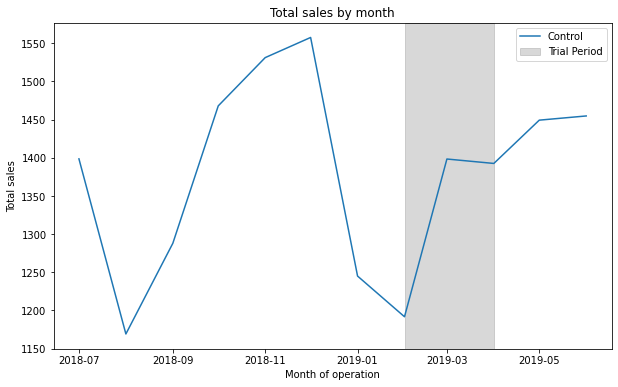

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type')

plt.axvspan(min(trialAssessment[(trialAssessment['YEARMONTH'] > 201901) & (trialAssessment['YEARMONTH'] < 201905)]['TransactionMonth']),
            max(trialAssessment[(trialAssessment['YEARMONTH'] > 201901) & (trialAssessment['YEARMONTH'] < 201905)]['TransactionMonth']),
            color='grey', alpha=0.3, label='Trial Period')

plt.xlabel("Month of operation")
plt.ylabel("Total sales")
plt.title("Total sales by month")
plt.legend()
plt.show()

In [32]:
# Step 1: Compute the scaling factor for the control store's customer counts
pre_trial_trial_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & 
                                        (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()

pre_trial_control_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & 
                                          (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()

scalingFactorForControlCust = pre_trial_trial_cust / pre_trial_control_cust

# Step 2: Apply the scaling factor to the control store's customer counts
measureOverTimeCusts = measure_over_time.copy()
measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'controlCustomers'] = \
    measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'nCustomers'] * scalingFactorForControlCust

measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'Store_type'] = 'Control'

# Step 3: Calculate the percentage difference between trial and control customers
measureOverTimeCusts['YEARMONTH'] = measureOverTimeCusts['YEARMONTH'].astype(int)
percentageDiff = measureOverTimeCusts[measureOverTimeCusts['STORE_NBR'].isin([trial_store, control_store]) & 
                                      (measureOverTimeCusts['YEARMONTH'] >= 201902) & 
                                      (measureOverTimeCusts['YEARMONTH'] <= 201904)]

percentageDiff['percentageDiff'] = (percentageDiff['nCustomers'] - percentageDiff['controlCustomers']) / \
                                   percentageDiff['controlCustomers'] * 100

# Display the resulting DataFrame for inspection
print(percentageDiff[['YEARMONTH', 'STORE_NBR', 'nCustomers', 'controlCustomers', 'percentageDiff']])


      YEARMONTH  STORE_NBR  nCustomers  controlCustomers  percentageDiff
1919     201902         77          40               NaN             NaN
2064     201902        226         107         32.977049      224.468085
2183     201903         77          46               NaN             NaN
2328     201903        226         124         38.216393      224.468085
2448     201904         77          47               NaN             NaN
2592     201904        226         133         40.990164      224.468085


In [33]:
# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == "Control"].copy()
pastCustomers_Controls95['nCusts'] = pastCustomers_Controls95['nCustomers'] * (1 + std_dev * 2)
pastCustomers_Controls95['Store_type'] = "Control 95th % confidence interval"


In [34]:
pastCustomers_Controls5 = (pastCustomers[pastCustomers['Store_type'] == 'Control']
                           .copy())
pastCustomers_Controls5['nCusts'] = (pastCustomers_Controls5['nCustomers'] *
                                      (1 - std_dev * 2))
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'


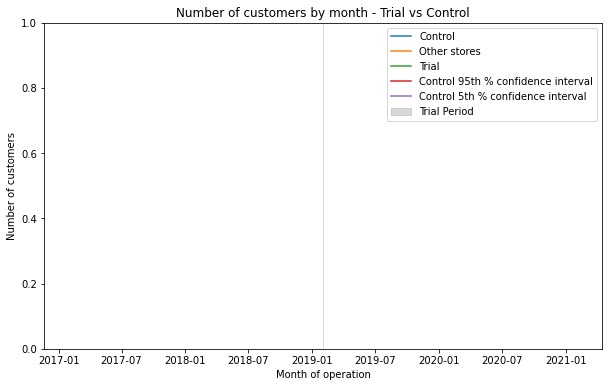

In [35]:
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

# Create the plot
plt.figure(figsize=(10, 6))

# Line plot for customer data by month
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='nCusts', hue='Store_type')

# Highlight the trial period with a shaded rectangle (trial period: Feb 2019 - April 2019)
plt.axvspan(min(trialAssessment[(trialAssessment['YEARMONTH'] > 201901) & (trialAssessment['YEARMONTH'] < 201905)]['TransactionMonth']),
            max(trialAssessment[(trialAssessment['YEARMONTH'] > 201901) & (trialAssessment['YEARMONTH'] < 201905)]['TransactionMonth']),
            color='grey', alpha=0.3, label='Trial Period')

# Add labels and title
plt.xlabel("Month of operation")
plt.ylabel("Number of customers")
plt.title("Number of customers by month - Trial vs Control")

# Show the plot
plt.legend()
plt.show()

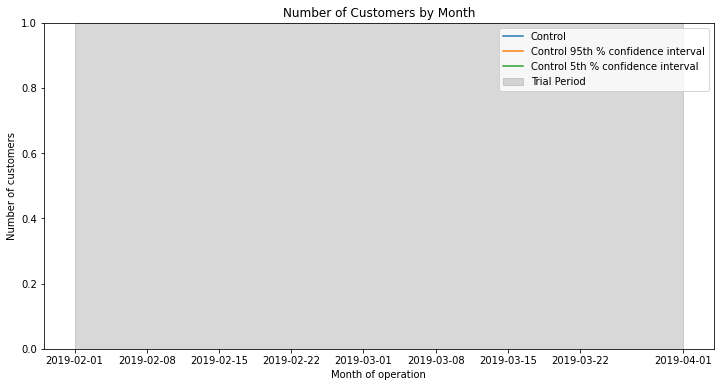

In [36]:
stdDev = percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'].std()

# Number of degrees of freedom
degreesOfFreedom = 7

# Calculate mean number of customers for trial and control stores
pastCustomers = (measureOverTimeCusts
                 .groupby(['YEARMONTH', 'Store_type'])
                 .agg({'nCustomers': 'mean'})
                 .reset_index()
                 .query('Store_type in ["Trial", "Control"]'))

# Control store 95th percentile
pastCustomers_Controls95 = (pastCustomers[pastCustomers['Store_type'] == 'Control']
                            .copy())
pastCustomers_Controls95['nCusts'] = (pastCustomers_Controls95['nCustomers'] *
                                       (1 + stdDev * 2))
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = (pastCustomers[pastCustomers['Store_type'] == 'Control']
                           .copy())
pastCustomers_Controls5['nCusts'] = (pastCustomers_Controls5['nCustomers'] *
                                      (1 - stdDev * 2))
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all data into one DataFrame
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

# Plotting
plt.figure(figsize=(12, 6))

# Plot trial and control store number of customers
sns.lineplot(data=trialAssessment, x='YEARMONTH', y='nCusts', hue='Store_type')

# Highlight the trial period
trial_start = '2019-02'
trial_end = '2019-04'
plt.axvspan(pd.to_datetime(trial_start), pd.to_datetime(trial_end), color='grey', alpha=0.3, label='Trial Period')

plt.xlabel("Month of operation")
plt.ylabel("Number of customers")
plt.title("Number of Customers by Month")
plt.legend()
plt.show()

In [37]:
store_86_data = df[df['STORE_NBR'] == 86]

# Aggregate metrics for store 86
measureOverTime = (df.groupby(['YEARMONTH', 'STORE_NBR']).agg(
    totSales=('TOT_SALES', 'sum'),                                # Total sales
    nCustomers=('LYLTY_CARD_NBR', pd.Series.nunique),             # Number of unique customers
    nTxnPerCust=('TXN_ID', 'count'),                              # Number of transactions per store/month
    nChipsPerTxn=('PROD_QTY', 'mean'),                            # Average quantity of chips per transaction
    total_units_sold=('PROD_QTY', 'sum')                          # Total number of units sold
).reset_index().sort_values(by=['YEARMONTH', 'STORE_NBR']))

# Filter to include only store 86 data
measureOverTime = measureOverTime[measureOverTime['STORE_NBR'] == 86]

In [38]:
trial_store = 86

potential_control_stores = df['STORE_NBR'].unique()
potential_control_stores = [store for store in potential_control_stores if store != trial_store]

corr_nSales = {}
corr_nCustomers = {}
magnitude_nSales = {}
magnitude_nCustomers = {}

for control_store in potential_control_stores:
    # Filter data for the trial store and the control store
    trial_store_data = df[df['STORE_NBR'] == trial_store]
    control_store_data = df[df['STORE_NBR'] == control_store]
    
    # Merge the trial and control data on YEARMONTH to align the data for comparison
    merged_data = pd.merge(trial_store_data, control_store_data, on='YEARMONTH', suffixes=('_trial', '_control'))
    
    # Calculate correlations for sales and customers
    corr_nSales[control_store] = merged_data['TOT_SALES_trial'].corr(merged_data['TOT_SALES_control'])
    corr_nCustomers[control_store] = merged_data['LYLTY_CARD_NBR_trial'].corr(merged_data['LYLTY_CARD_NBR_control'])
    
    # Calculate magnitude for sales and customers (absolute difference)
    magnitude_nSales[control_store] = abs(merged_data['TOT_SALES_trial'].mean() - merged_data['TOT_SALES_control'].mean())
    magnitude_nCustomers[control_store] = abs(merged_data['LYLTY_CARD_NBR_trial'].mean() - merged_data['LYLTY_CARD_NBR_control'].mean())

sorted_corr_nSales = sorted(corr_nSales.items(), key=lambda x: x[1], reverse=True)
sorted_corr_nCustomers = sorted(corr_nCustomers.items(), key=lambda x: x[1], reverse=True)
sorted_magnitude_nSales = sorted(magnitude_nSales.items(), key=lambda x: x[1])
sorted_magnitude_nCustomers = sorted(magnitude_nCustomers.items(), key=lambda x: x[1])

print("Top control stores based on sales correlation:", sorted_corr_nSales[:5],"\n")
print("Top control stores based on customer correlation:", sorted_corr_nCustomers[:5],"\n")
print("Top control stores based on sales magnitude:", sorted_magnitude_nSales[:5],"\n")
print("Top control stores based on customer magnitude:", sorted_magnitude_nCustomers[:5],"\n")

Top control stores based on sales correlation: [(140, 0.021088826466514058), (158, 0.016032953598455454), (177, 0.015506600098711323), (214, 0.008436443221374558), (192, 0.005196239835403802)] 

Top control stores based on customer correlation: [(177, 0.05526005025798027), (192, 0.019423607817955983), (188, 0.01437391698593839), (185, 0.011740675343609366), (182, 0.007392780549288567)] 

Top control stores based on sales magnitude: [(69, 0.0004834429763960202), (112, 0.0006959344075658791), (109, 0.001091411261582742), (83, 0.002189446741237333), (207, 0.003942874323512591)] 

Top control stores based on customer magnitude: [(87, 304.1545800253516), (85, 868.3500000000058), (89, 1792.3782911802991), (90, 2674.847357992083), (84, 3270.860118189681)] 



In [39]:
corr_weight = 0.5

# Normalize the magnitude to make sure it has a similar scale as correlation
max_magnitude_sales = max(magnitude_nSales.values())
max_magnitude_customers = max(magnitude_nCustomers.values())

score_nSales = {store: corr_weight * corr_nSales[store] + (1 - corr_weight) * (1 - (magnitude_nSales[store] / max_magnitude_sales))
                for store in corr_nSales}
score_nCustomers = {store: corr_weight * corr_nCustomers[store] + (1 - corr_weight) * (1 - (magnitude_nCustomers[store] / max_magnitude_customers))
                    for store in corr_nCustomers}

combined_scores = {store: (score_nSales[store] + score_nCustomers[store]) / 2 for store in score_nSales}

score_Control = pd.DataFrame(list(combined_scores.items()), columns=['Store2', 'finalControlScore'])

score_Control = score_Control[score_Control['Store2'] != trial_store].sort_values(by='finalControlScore', ascending=False)

control_store = score_Control.iloc[1]['Store2']  # Selecting the second-ranked highest store

print(f"The control store for trial store {trial_store} is store {control_store}.")

The control store for trial store 86 is store 82.0.


In [40]:
pastSales.head()

,YEARMONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales,Store_type,TransactionMonth
73,201807,77,268.40,47,1.085106,1.509804,3.485714,NaN,Trial,2018-07-01
218,201807,226,1398.60,130,1.230769,2.000000,4.370625,231.054469,Control,2018-07-01
336,201808,77,247.50,46,1.000000,1.543478,3.485915,NaN,Trial,2018-08-01
480,201808,226,1169.25,124,1.177419,1.890411,4.236413,193.164906,Control,2018-08-01
601,201809,77,216.80,40,1.050000,1.571429,3.284848,NaN,Trial,2018-09-01


In [41]:
measureOverTimeSales.head()

,YEARMONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
0,201807,1,188.9,47,1.042553,1.183673,3.256897,NaN
1,201807,2,140.5,36,1.055556,1.131579,3.267442,NaN
2,201807,3,1164.9,108,1.240741,1.962687,4.429278,NaN
3,201807,4,1318.3,121,1.256198,1.986842,4.365232,NaN
4,201807,5,763.8,86,1.290698,2.000000,3.440541,NaN


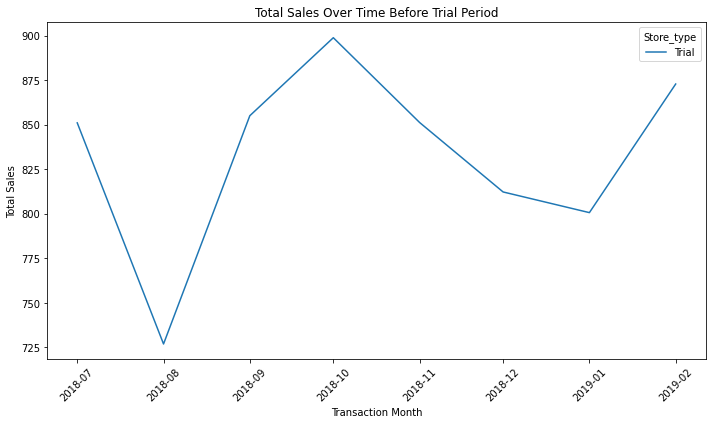

In [42]:
trial_store = 86
control_store = 82  # You would have calculated this earlier

# Convert YEARMONTH to an integer
measureOverTime['YEARMONTH'] = measureOverTime['YEARMONTH'].astype(int)

# Step 1: Create the 'Store_type' column
measureOverTime['Store_type'] = measureOverTime['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other'))

# Step 2: Filter data for YEARMONTH < 201903
measureOverTimeSales = measureOverTime[measureOverTime['YEARMONTH'] < 201903]

# Step 3: Create TransactionMonth by converting YEARMONTH to a datetime format
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(
    measureOverTimeSales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Step 4: Group data by TransactionMonth and Store_type to calculate total sales
pastSales = measureOverTimeSales.groupby(['TransactionMonth', 'Store_type']).agg(
    totSales=('totSales', 'sum')
).reset_index()

# Step 5: Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')

plt.title('Total Sales Over Time Before Trial Period')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Calculate total sales for trial store and control store pre-trial period
trial_store_sales = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]
control_store_sales = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]

# Sum of sales for each store pre-trial
trial_store_total_sales = trial_store_sales[trial_store_sales['YEARMONTH'] < 201902]['totSales'].sum()
control_store_total_sales = control_store_sales[control_store_sales['YEARMONTH'] < 201902]['totSales'].sum()

# Calculate scaling factor
scaling_factor_for_control_sales = trial_store_total_sales / control_store_total_sales


In [44]:
# Apply the scaling factor to the control store sales
measureOverTimeSales['scaledControlSales'] = measureOverTimeSales.apply(
    lambda row: row['TOT_SALES'] * scaling_factor_for_control_sales if row['STORE_NBR'] == control_store else None, 
    axis=1
)


In [45]:
# Filter for trial and scaled control sales
trial_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store]
scaled_control_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store]

# Merge on YEARMONTH
merged_sales = pd.merge(trial_sales[['YEARMONTH', 'totSales']], 
                        scaled_control_sales[['YEARMONTH', 'scaledControlSales']], 
                        on='YEARMONTH', 
                        how='inner')

# Calculate percentage difference
merged_sales['percentageDiff'] = abs((merged_sales['totSales'] - merged_sales['scaledControlSales']) / merged_sales['scaledControlSales']) * 100

# Show the percentage difference
print(merged_sales[['YEARMONTH', 'percentageDiff']])


Empty DataFrame
Columns: [YEARMONTH, percentageDiff]
Index: []


In [46]:
print(trial_sales['YEARMONTH'].unique())
print(scaled_control_sales['YEARMONTH'].unique())


[201807 201808 201809 201810 201811 201812 201901 201902]
[]


In [47]:
scaled_control_sales.head()

,YEARMONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,total_units_sold,Store_type,TransactionMonth,scaledControlSales


In [48]:
measureOverTimeSales.head()

,YEARMONTH,STORE_NBR,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,total_units_sold,Store_type,TransactionMonth,scaledControlSales
82,201807,86,851.00,94,120,1.991667,239,Trial,2018-07-01,None
344,201808,86,726.85,92,106,1.915094,203,Trial,2018-08-01,None
609,201809,86,855.00,100,121,2.000000,242,Trial,2018-09-01,None
874,201810,86,898.80,105,130,2.000000,260,Trial,2018-10-01,None
1138,201811,86,851.20,95,119,2.000000,238,Trial,2018-11-01,None


In [49]:
measureOverTimeSales['STORE_NBR'] == control_store

82      False
344     False
609     False
874     False
1138    False
1402    False
1664    False
1927    False
Name: STORE_NBR, dtype: bool

In [50]:
print(trial_sales['YEARMONTH'].dtype)
print(scaled_control_sales['YEARMONTH'].dtype)


int32
int32


In [51]:
print(measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].head())


Empty DataFrame
Columns: [YEARMONTH, STORE_NBR, totSales, nCustomers, nTxnPerCust, nChipsPerTxn, total_units_sold, Store_type, TransactionMonth, scaledControlSales]
Index: []


In [52]:
merged_sales = pd.merge(trial_sales[['YEARMONTH', 'totSales']], 
                        scaled_control_sales[['YEARMONTH', 'scaledControlSales']], 
                        on='YEARMONTH', 
                        how='outer')

# Check the merged data
print(merged_sales.head())


   YEARMONTH  totSales scaledControlSales
0     201807    851.00                NaN
1     201808    726.85                NaN
2     201809    855.00                NaN
3     201810    898.80                NaN
4     201811    851.20                NaN


In [53]:
total_sales_trial_store = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store & 
                                           (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

total_sales_control_store = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store & 
                                             (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

scaling_factor_for_control_sales = total_sales_trial_store / total_sales_control_store

print(f"Scaling factor for control store sales: {scaling_factor_for_control_sales}")


Scaling factor for control store sales: nan


In [54]:
# Check data for trial store in the pre-trial period
trial_store_pre_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & 
                                         (pre_trial_measures['YEARMONTH'] < 201902)]
print(f"Trial store pre-trial data:\n{trial_store_pre_trial[['YEARMONTH', 'totSales']]}")

# Check data for control store in the pre-trial period
control_store_pre_trial = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & 
                                           (pre_trial_measures['YEARMONTH'] < 201902)]
print(f"Control store pre-trial data:\n{control_store_pre_trial[['YEARMONTH', 'totSales']]}")


Trial store pre-trial data:
      YEARMONTH  totSales
82       201807    851.00
344      201808    726.85
609      201809    855.00
874      201810    898.80
1138     201811    851.20
1402     201812    812.20
1664     201901    800.60
Control store pre-trial data:
      YEARMONTH  totSales
78       201807     312.5
341      201808     292.8
606      201809     316.7
871      201810     285.3
1135     201811     321.3
1399     201812     301.3
1661     201901     340.5


In [55]:
print(f"Missing trial store data:\n{trial_store_pre_trial.isna().sum()}")
print(f"Missing control store data:\n{control_store_pre_trial.isna().sum()}")


Missing trial store data:
YEARMONTH          0
STORE_NBR          0
totSales           0
nCustomers         0
nTxnPerCust        0
nChipsPerTxn       0
avgPricePerUnit    0
dtype: int64
Missing control store data:
YEARMONTH          0
STORE_NBR          0
totSales           0
nCustomers         0
nTxnPerCust        0
nChipsPerTxn       0
avgPricePerUnit    0
dtype: int64


In [56]:
print(f"Data types of trial store data:\n{trial_store_pre_trial.dtypes}")
print(f"Data types of control store data:\n{control_store_pre_trial.dtypes}")


Data types of trial store data:
YEARMONTH            int32
STORE_NBR            int64
totSales           float64
nCustomers           int64
nTxnPerCust        float64
nChipsPerTxn       float64
avgPricePerUnit    float64
dtype: object
Data types of control store data:
YEARMONTH            int32
STORE_NBR            int64
totSales           float64
nCustomers           int64
nTxnPerCust        float64
nChipsPerTxn       float64
avgPricePerUnit    float64
dtype: object


In [57]:
# If valid, calculate the scaling factor
if not trial_store_pre_trial.empty and not control_store_pre_trial.empty:
    total_sales_trial_store = trial_store_pre_trial['totSales'].sum()
    total_sales_control_store = control_store_pre_trial['totSales'].sum()

    scaling_factor_for_control_sales = total_sales_trial_store / total_sales_control_store
    print(f"Scaling factor for control store sales: {scaling_factor_for_control_sales}")
else:
    print("Pre-trial data is missing for either trial or control store.")


Scaling factor for control store sales: 2.670314227792112


In [58]:
# Apply the scaling factor to control store sales
measureOverTimeSales = measureOverTime.copy()  # Create a copy of the original data
measureOverTimeSales['scaledControlSales'] = measureOverTimeSales.apply(
    lambda row: row['totSales'] * scaling_factor_for_control_sales if row['STORE_NBR'] == control_store else row['totSales'], 
    axis=1
)

# Verify the scaled sales
print(measureOverTimeSales[['YEARMONTH', 'STORE_NBR', 'totSales', 'scaledControlSales']].head())


      YEARMONTH  STORE_NBR  totSales  scaledControlSales
82       201807         86    851.00              851.00
344      201808         86    726.85              726.85
609      201809         86    855.00              855.00
874      201810         86    898.80              898.80
1138     201811         86    851.20              851.20


In [59]:
# Filter out the trial and control store data
trial_store_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']]
scaled_control_store_sales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store][['YEARMONTH', 'scaledControlSales']]

# Merge the dataframes on YEARMONTH to align trial and control sales
merged_sales = pd.merge(trial_store_sales, scaled_control_store_sales, on='YEARMONTH', how='inner')

# Calculate the percentage difference
merged_sales['percentageDiff'] = abs(merged_sales['totSales'] - merged_sales['scaledControlSales']) / merged_sales['scaledControlSales'] * 100

# View the result
print(merged_sales[['YEARMONTH', 'totSales', 'scaledControlSales', 'percentageDiff']])


Empty DataFrame
Columns: [YEARMONTH, totSales, scaledControlSales, percentageDiff]
Index: []


In [60]:
# Check unique YEARMONTH values in both DataFrames
print("YEARMONTH in measureOverTimeSales: ", measureOverTimeSales['YEARMONTH'].unique())
print("YEARMONTH in scaledControlSales: ", scaled_control_store_sales['YEARMONTH'].unique())

# Find the intersection
common_yearmonths = set(measureOverTimeSales['YEARMONTH']).intersection(set(scaled_control_store_sales['YEARMONTH']))
print("Common YEARMONTH values: ", common_yearmonths)


YEARMONTH in measureOverTimeSales:  [201807 201808 201809 201810 201811 201812 201901 201902 201903 201904
 201905 201906]
YEARMONTH in scaledControlSales:  []
Common YEARMONTH values:  set()


There are no common YEARMONTH values between measureOverTimeSales and scaledControlSales

In [61]:
# Add a Store_type column for trial and control stores
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Control')

# Group sales by store type and month (summing sales within each group)
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).agg(totSales=('totSales', 'sum')).reset_index()

# Add a transaction month column
pastSales['TransactionMonth'] = pastSales['YEARMONTH']


In [62]:
# Calculate the 95th percentile for control store sales
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + 2 * stdDev)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Calculate the 5th percentile for control store sales
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - 2 * stdDev)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'


In [63]:
# Convert YEARMONTH into a datetime format (assuming YEARMONTH is in 'YYYYMM' format)
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(measureOverTimeSales['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Add a Store_type column for trial and control stores
measureOverTimeSales['Store_type'] = np.where(measureOverTimeSales['STORE_NBR'] == trial_store, 'Trial', 'Control')

# Group sales by store type and month (summing sales within each group)
pastSales = measureOverTimeSales.groupby(['TransactionMonth', 'Store_type']).agg(totSales=('totSales', 'sum')).reset_index()


In [64]:
# Calculate the 95th percentile for control store sales
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + 2 * stdDev)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Calculate the 5th percentile for control store sales
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - 2 * stdDev)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'


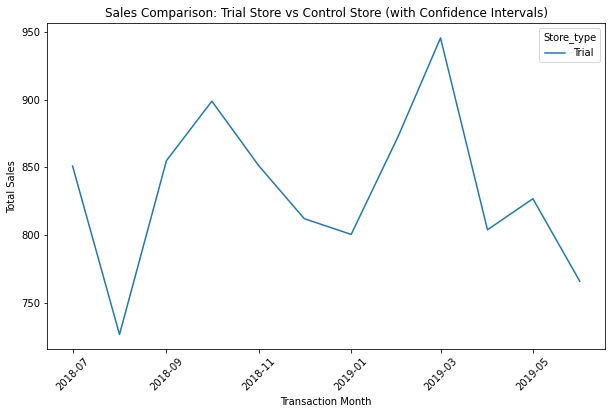

In [65]:
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

plt.figure(figsize=(10,6))

# Plot the sales for each store type over time
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type')

plt.title('Sales Comparison: Trial Store vs Control Store (with Confidence Intervals)')
plt.xlabel('Transaction Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Combine pastSales, pastSales_Controls95, and pastSales_Controls5 into one DataFrame
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])


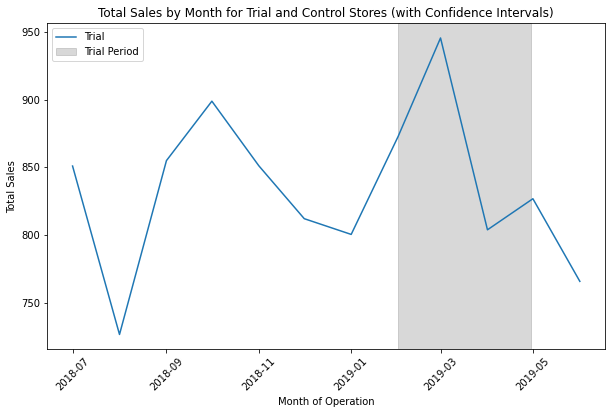

In [67]:
plt.figure(figsize=(10,6))

# Plot the total sales with line styles differentiating the store types
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type', style='Store_type')

# Shade the trial period (e.g., between February 2019 and April 2019)
plt.axvspan(pd.to_datetime("2019-02-01"), pd.to_datetime("2019-04-30"), color='grey', alpha=0.3, label='Trial Period')

# Add labels and title
plt.title('Total Sales by Month for Trial and Control Stores (with Confidence Intervals)')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Display the legend and plot
plt.legend()
plt.show()

In [68]:
# Calculate scaling factor for customers between trial and control store
scalingFactorForControlCust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & 
                                               (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum() / \
                              pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & 
                                               (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()

print(f"Scaling factor for control store customers: {scalingFactorForControlCust}")


Scaling factor for control store customers: 2.2644067796610168


In [69]:
# Apply the scaling factor to control store customers
measureOverTimeCusts['controlCustomers'] = measureOverTimeCusts.loc[measureOverTimeCusts['STORE_NBR'] == control_store, 'nCustomers'] * scalingFactorForControlCust

# Assign store types for Trial and Control stores
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else 'Other stores'
)


In [70]:
# Merge scaled control customers and trial store customers
percentageDiff = pd.merge(
    measureOverTimeCusts[['YEARMONTH', 'controlCustomers']], 
    measureOverTime[measureOverTime['STORE_NBR'] == trial_store][['nCustomers', 'YEARMONTH']], 
    on="YEARMONTH"
)

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlCustomers'] - percentageDiff['nCustomers']) / percentageDiff['controlCustomers']

# Check the output
print(percentageDiff)


      YEARMONTH  controlCustomers  nCustomers  percentageDiff
0        201807               NaN          94             NaN
1        201807               NaN          94             NaN
2        201807               NaN          94             NaN
3        201807               NaN          94             NaN
4        201807               NaN          94             NaN
...         ...               ...         ...             ...
3160     201906               NaN          92             NaN
3161     201906               NaN          92             NaN
3162     201906               NaN          92             NaN
3163     201906               NaN          92             NaN
3164     201906               NaN          92             NaN

[3165 rows x 4 columns]


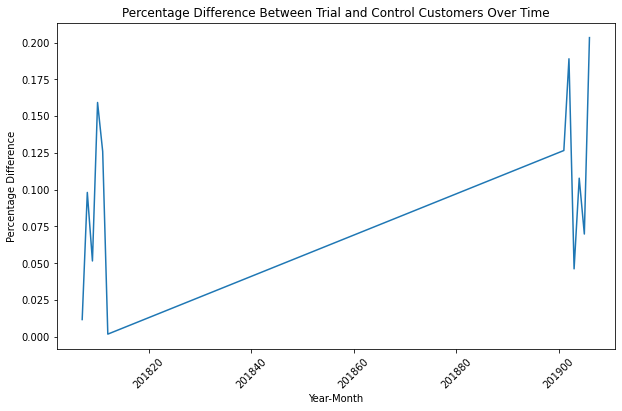

In [71]:
plt.figure(figsize=(10,6))
sns.lineplot(data=percentageDiff, x='YEARMONTH', y='percentageDiff')
plt.title('Percentage Difference Between Trial and Control Customers Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Difference')
plt.xticks(rotation=45)
plt.show()

In [72]:
# Calculate the average number of customers by YEARMONTH and Store_type
pastCustomers = measureOverTimeCusts.groupby(['YEARMONTH', 'Store_type']).agg(
    nCusts=('nCustomers', 'mean')
).reset_index()

# Filter to include only 'Trial' and 'Control' stores
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]


In [73]:
# Define a function to calculate percentiles
def calculate_percentiles(df, stdDev, multiplier):
    return df.copy().assign(
        nCusts=df['nCusts'] * (1 + stdDev * multiplier)
    ).assign(
        Store_type="Control {} % confidence interval".format("95th" if multiplier > 0 else "5th")
    )

# Calculate the 95th percentile for control store customers
pastCustomers_Controls95 = calculate_percentiles(
    pastCustomers[pastCustomers['Store_type'] == 'Control'],
    stdDev,
    2
)

# Calculate the 5th percentile for control store customers
pastCustomers_Controls5 = calculate_percentiles(
    pastCustomers[pastCustomers['Store_type'] == 'Control'],
    stdDev,
    -2
)

# Combine pastCustomers with percentiles
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])


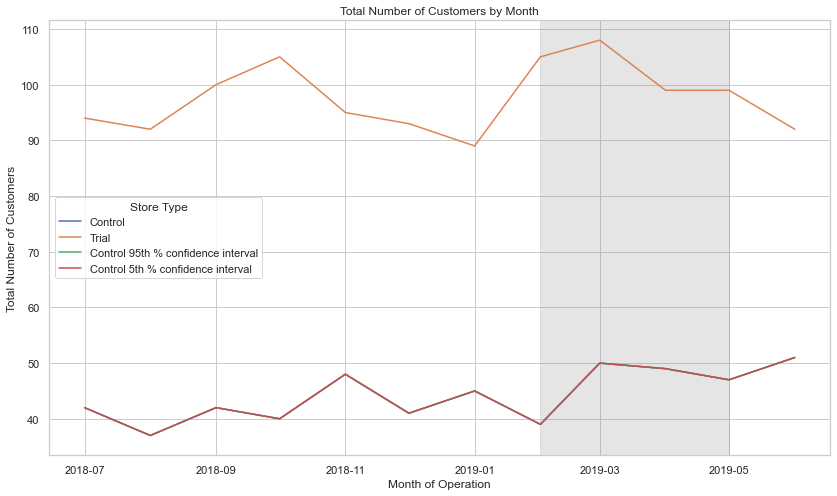

In [74]:
sns.set(style="whitegrid")

# Convert YEARMONTH to a datetime format for better plotting
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['YEARMONTH'].astype(str) + '01', format='%Y%m%d')

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the total number of customers by month
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='nCusts', hue='Store_type')

# Add shaded region for trial period
plt.axvspan(pd.Timestamp('2019-02-01'), pd.Timestamp('2019-05-01'), color='grey', alpha=0.2)

# Set labels and title
plt.xlabel("Month of Operation")
plt.ylabel("Total Number of Customers")
plt.title("Total Number of Customers by Month")

# Show legend
plt.legend(title='Store Type')

# Show plot
plt.show()

In [75]:
trialAssessment.head()

,YEARMONTH,Store_type,nCusts,TransactionMonth
0,201807,Control,42.0,2018-07-01
2,201807,Trial,94.0,2018-07-01
3,201808,Control,37.0,2018-08-01
5,201808,Trial,92.0,2018-08-01
6,201809,Control,42.0,2018-09-01


<Axes: xlabel='Store_type', ylabel='nCusts'>

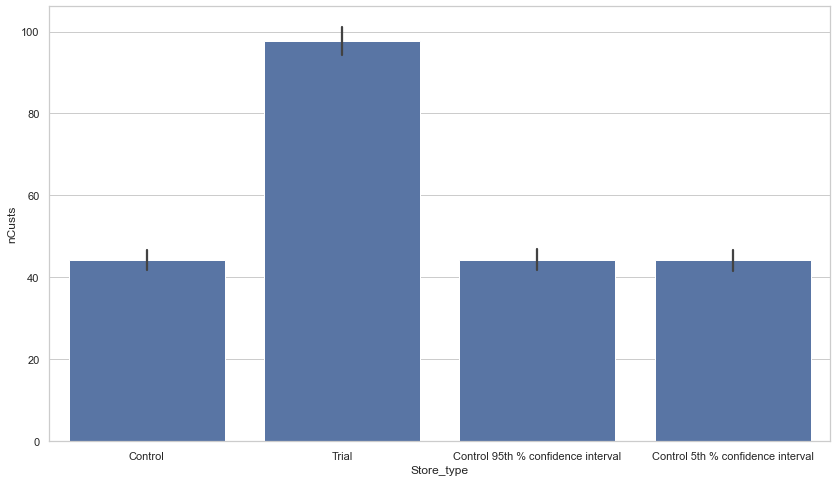

In [76]:
plt.figure(figsize=(14,8))
sns.barplot(data=trialAssessment,x='Store_type',y='nCusts')

In [77]:
# Filter data for trial store 88
trial_store = 88
measureOverTime = df[df['STORE_NBR'] == trial_store].copy()

# Aggregate metrics
measureOverTime = (df.groupby(['YEARMONTH', 'STORE_NBR']).agg(
    totSales=('TOT_SALES', 'sum'),                                # Total sales
    nCustomers=('LYLTY_CARD_NBR', pd.Series.nunique),             # Number of unique customers
    nTxnPerCust=('TXN_ID', 'count'),                              # Number of transactions per store/month
    nChipsPerTxn=('PROD_QTY', 'mean'),                            # Average quantity of chips per transaction
    total_units_sold=('PROD_QTY', 'sum')                          # Total number of units sold
    ).reset_index()
    .sort_values(by=['YEARMONTH', 'STORE_NBR']))

# Filter to include only trial store data
measureOverTime = measureOverTime[measureOverTime['STORE_NBR'] == trial_store]


In [82]:
print(measureOverTime[['totSales', 'nCustomers']].isnull().sum())

totSales      0
nCustomers    0
dtype: int64


In [85]:
def calculate_correlations(trial_store, control_stores, measureOverTime):
    corr_nSales = {}
    corr_nCustomers = {}
    
    for control_store in control_stores:
        trial_store_data = measureOverTime[measureOverTime['STORE_NBR'] == trial_store].set_index('YEARMONTH')
        control_store_data = measureOverTime[measureOverTime['STORE_NBR'] == control_store].set_index('YEARMONTH')

        # Ensure data is aligned by YEARMONTH before calculating correlation
        merged_data = trial_store_data.join(control_store_data, lsuffix='_trial', rsuffix='_control')

        # Calculate correlation for total sales
        corr_nSales[control_store] = merged_data['totSales_trial'].corr(merged_data['totSales_control'])

        # Calculate correlation for number of customers
        corr_nCustomers[control_store] = merged_data['nCustomers_trial'].corr(merged_data['nCustomers_control'])

    return corr_nSales, corr_nCustomers


In [87]:
def calculate_magnitudes(trial_store, control_stores, measureOverTime):
    magnitude_nSales = {}
    magnitude_nCustomers = {}

    for control_store in control_stores:
        trial_store_data = measureOverTime[measureOverTime['STORE_NBR'] == trial_store].set_index('YEARMONTH')
        control_store_data = measureOverTime[measureOverTime['STORE_NBR'] == control_store].set_index('YEARMONTH')

        # Calculate magnitude difference for total sales
        avg_trial_sales = trial_store_data['totSales'].mean()
        avg_control_sales = control_store_data['totSales'].mean()
        magnitude_nSales[control_store] = abs(avg_trial_sales - avg_control_sales) / avg_trial_sales

        # Calculate magnitude difference for number of customers
        avg_trial_customers = trial_store_data['nCustomers'].mean()
        avg_control_customers = control_store_data['nCustomers'].mean()
        magnitude_nCustomers[control_store] = abs(avg_trial_customers - avg_control_customers) / avg_trial_customers

    return magnitude_nSales, magnitude_nCustomers


In [86]:
def calculate_combined_score(corr_nSales, corr_nCustomers, magnitude_nSales, magnitude_nCustomers, corr_weight=0.5):
    score_nSales = {}
    score_nCustomers = {}
    score_Control = {}

    for control_store in corr_nSales.keys():
        # Calculate scores for sales and customers
        score_nSales[control_store] = corr_weight * corr_nSales[control_store] + (1 - corr_weight) * (1 - magnitude_nSales[control_store])
        score_nCustomers[control_store] = corr_weight * corr_nCustomers[control_store] + (1 - corr_weight) * (1 - magnitude_nCustomers[control_store])

        # Combine the scores into a final control score
        score_Control[control_store] = (score_nSales[control_store] + score_nCustomers[control_store]) / 2

    return score_Control


In [90]:
def select_control_store(trial_store, score_Control):
    # Sort stores by their score in descending order (highest score first)
    sorted_stores = sorted(score_Control.items(), key=lambda x: x[1], reverse=True)
    
    # Iterate over sorted stores to find the best control store (ignoring the trial store itself)
    for store, score in sorted_stores:
        if store != trial_store:  # Exclude the trial store itself
            return store  # Return the best control store
    
    return None  # If no valid control store is found


In [91]:
trial_store = 88
control_stores = measureOverTime['STORE_NBR'].unique()

# Step 1: Calculate correlations
corr_nSales, corr_nCustomers = calculate_correlations(trial_store, control_stores, measureOverTime)

# Step 2: Calculate magnitude
magnitude_nSales, magnitude_nCustomers = calculate_magnitudes(trial_store, control_stores, measureOverTime)

# Step 3: Calculate combined score
score_Control = calculate_combined_score(corr_nSales, corr_nCustomers, magnitude_nSales, magnitude_nCustomers)

# Step 4: Select the best control store
control_store = select_control_store(trial_store, score_Control)

print(f"The best control store for trial store {trial_store} is {control_store}")


The best control store for trial store 88 is None


In [92]:
# Print the final scores for all stores
print("Final control scores:")
for store, score in score_Control.items():
    print(f"Store {store}: {score}")

# Now select the control store
control_store = select_control_store(trial_store, score_Control)
print(f"The best control store for trial store {trial_store} is {control_store}")


Final control scores:
Store 88: 1.0
The best control store for trial store 88 is None


In [93]:
print(measureOverTime[measureOverTime['STORE_NBR'] == 237])


Empty DataFrame
Columns: [YEARMONTH, STORE_NBR, totSales, nCustomers, nTxnPerCust, nChipsPerTxn, total_units_sold]
Index: []


In [94]:
if 237 in score_Control:
    print(f"Store 237 score: {score_Control[237]}")
else:
    print("Store 237 is not in the control scores.")


Store 237 is not in the control scores.


In [95]:
# Check if store 237 is present in correlation and magnitude scores
print("Stores with correlation scores:", corr_nSales.keys())
print("Stores with magnitude scores:", magnitude_nSales.keys())

# Specifically check for store 237
if 237 in corr_nSales:
    print(f"Store 237 correlation score: {corr_nSales[237]}")
else:
    print("Store 237 is not in the correlation scores.")

if 237 in magnitude_nSales:
    print(f"Store 237 magnitude score: {magnitude_nSales[237]}")
else:
    print("Store 237 is not in the magnitude scores.")


Stores with correlation scores: dict_keys([88])
Stores with magnitude scores: dict_keys([88])
Store 237 is not in the correlation scores.
Store 237 is not in the magnitude scores.


In [96]:
# Recalculate the final control scores
score_nSales = pd.DataFrame.from_dict(corr_nSales, orient='index', columns=['corr_nSales'])
score_nCustomers = pd.DataFrame.from_dict(corr_nCustomers, orient='index', columns=['corr_nCustomers'])
magnitude_nSales_df = pd.DataFrame.from_dict(magnitude_nSales, orient='index', columns=['magnitude_nSales'])
magnitude_nCustomers_df = pd.DataFrame.from_dict(magnitude_nCustomers, orient='index', columns=['magnitude_nCustomers'])

# Combine scores
score_Control = score_nSales.join(magnitude_nSales_df).join(score_nCustomers).join(magnitude_nCustomers_df)

# Calculate final score
score_Control['finalControlScore'] = (corr_weight * score_Control['corr_nSales'] + (1 - corr_weight) * score_Control['magnitude_nSales'] +
                                      corr_weight * score_Control['corr_nCustomers'] + (1 - corr_weight) * score_Control['magnitude_nCustomers']) / 2

print(score_Control)


    corr_nSales  magnitude_nSales  corr_nCustomers  magnitude_nCustomers  \
88          1.0               0.0              1.0                   0.0   

    finalControlScore  
88                0.5  


In [97]:
control_store = select_control_store(trial_store, score_Control.to_dict()['finalControlScore'])
print(f"The best control store for trial store {trial_store} is {control_store}")


The best control store for trial store 88 is None


There is no best control store for trial store 88 

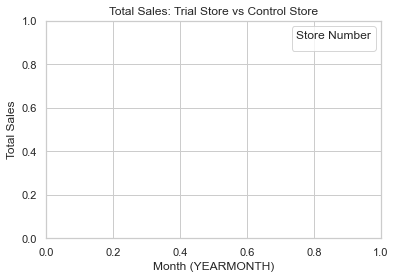

In [98]:
# Filter for pre-trial period and select relevant stores (trial, control, and others)
pastSales = measureOverTimeSales[(measureOverTimeSales['YEARMONTH'] < 201902) & 
                                 (measureOverTimeSales['STORE_NBR'].isin([trial_store, control_store]))]

# Plot total sales over time
sns.lineplot(data=pastSales, x='YEARMONTH', y='totSales', hue='STORE_NBR')
plt.title('Total Sales: Trial Store vs Control Store')
plt.xlabel('Month (YEARMONTH)')
plt.ylabel('Total Sales')
plt.legend(title='Store Number')
plt.show()

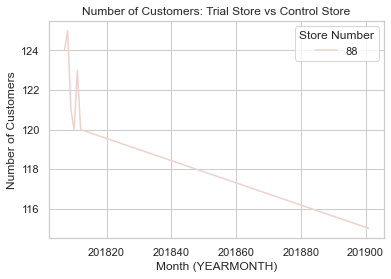

In [99]:
# Filter for pre-trial period and select relevant stores (trial, control, and others)
pastCustomers = measureOverTimeCusts[(measureOverTimeCusts['YEARMONTH'] < 201902) & 
                                     (measureOverTimeCusts['STORE_NBR'].isin([trial_store, control_store]))]

# Plot number of customers over time
sns.lineplot(data=pastCustomers, x='YEARMONTH', y='nCustomers', hue='STORE_NBR')
plt.title('Number of Customers: Trial Store vs Control Store')
plt.xlabel('Month (YEARMONTH)')
plt.ylabel('Number of Customers')
plt.legend(title='Store Number')
plt.show()


In [101]:
# Step 1: Calculate the scaling factor for control sales
scalingFactorForControlSales = (pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['totSales'].sum() /
                                pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['totSales'].sum())

print(f"Scaling factor for control sales: {scalingFactorForControlSales}")

# Step 2: Apply the scaling factor to the control store's sales
measureOverTimeSales = measureOverTime.copy()  # Making a copy of the dataframe

# Create a new column for scaled control sales
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['scaledControlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

# Step 3: Calculate the percentage difference between scaled control sales and trial sales
trialSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']].copy()
trialSales.rename(columns={'totSales': 'trialSales'}, inplace=True)

# Merging trial sales with scaled control sales on YEARMONTH
percentageDiff = pd.merge(trialSales, scaledControlSales[['YEARMONTH', 'scaledControlSales']], on='YEARMONTH')

# Calculate the absolute percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['scaledControlSales'] - percentageDiff['trialSales']) / percentageDiff['scaledControlSales'] * 100

# Display the resulting DataFrame
print(percentageDiff)


Scaling factor for control sales: inf
Empty DataFrame
Columns: [YEARMONTH, trialSales, scaledControlSales, percentageDiff]
Index: []
